# Time Series Analysis BBNI Stock Price
    
## Kelompok 4

- Salsabila Kanaya (2001360)
- Shafa Meira Wahyono (2007723)
- Sri Nanda Ameliani (2008196)
- Yosafat (2009929)

## Sumber Dataset : 
**Link** : https://id.investing.com/equities/bank-bni-tbk-historical-data

## Overview

Time Series Analysis adalah prediksi angka berdasarkan waktu tertentu secara sequential (berurutan). Misal : harga saham, cuaca, harga barang, dan sebagainya.

Data ini adalah data historis harga saham PT. Bank Negara Indonesia (Persero) Tbk dengan kode saham (BBNI). Berikut adalah atribut yang terdapat pada data:


1. **Tanggal**, atribut yang menyatakan indeks waktu dengan format (YYYY-dd-mm)
2. **Pembukaan**, atribut yang menyatakan harga saham pada Pembukaan (waktu ketika bursa saham dibuka) 
3. **Penutupan**, atribut yang menyatakan harga saham pada Penutupan (waktu ketika bursa saham ditutup)
4. **Tertinggi**, atribut yang menyatakan harga saham tertinggi pada indeks waktu tertentu
5. **Terendah**, atribut yang menyatakan harga saham terendah pada indeks waktu tertentu
6. **Vol.**, atribut yang menyatakan volume perdagangan saham pada indeks waktu tertentu
7. **Perubahan(%)**, atribut yang menyatakan perubahan harga saham (dalam persen) pada indeks waktu tertentu


## Goal

Melakukan Exploratory Data Analysis pada data Time Series

# Prerequisite

## Import Library

In [1]:
%matplotlib inline
import numpy as np                  # library untuk matriks
import pandas as pd                 # library untuk manipulasi dan analisis data
import matplotlib.pyplot as plt     # library untuk visualisasi plot
import seaborn as sns               # library untuk visualisasi plot
import math      
import datetime as dt

from tabulate import tabulate
from IPython.display import Markdown, display

## Read Data

In [2]:
data_f = pd.read_csv("C:\\Users\\LENOVO\\A_DMW\\Time Series\\Dataset\\Data Historis BBNI.csv")
data_f['Terakhir'] = data_f['Terakhir'] * 1000
data_f['Pembukaan'] = data_f['Pembukaan'] * 1000
data_f['Tertinggi'] = data_f['Tertinggi'] * 1000
data_f['Terendah'] = data_f['Terendah'] * 1000
display(Markdown(data_f.head(10).to_markdown(index=False)))
#display(Markdown(data_f.to_markdown))                                                                          

| Tanggal    |   Terakhir |   Pembukaan |   Tertinggi |   Terendah | Vol.   | Perubahan%   |
|:-----------|-----------:|------------:|------------:|-----------:|:-------|:-------------|
| 10/12/2021 |       6775 |        6800 |        6850 |       6750 | 22,40M | -0,73%       |
| 09/12/2021 |       6825 |        6900 |        6900 |       6800 | 11,50M | -0,36%       |
| 08/12/2021 |       6850 |        7050 |        7075 |       6850 | 34,63M | -2,84%       |
| 07/12/2021 |       7050 |        6900 |        7050 |       6850 | 26,35M | 2,92%        |
| 06/12/2021 |       6850 |        6725 |        6925 |       6725 | 26,79M | 1,86%        |
| 03/12/2021 |       6725 |        6850 |        6875 |       6725 | 12,62M | -1,47%       |
| 02/12/2021 |       6825 |        6650 |        6875 |       6550 | 40,25M | 2,63%        |
| 01/12/2021 |       6650 |        6800 |        6900 |       6600 | 51,26M | -2,21%       |
| 30/11/2021 |       6800 |        7000 |        7000 |       6800 | 51,54M | -2,16%       |
| 29/11/2021 |       6950 |        6875 |        7025 |       6750 | 55,09M | 1,09%        |

## Mengecek Tipe Data

In [3]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1945 non-null   object 
 1   Terakhir    1945 non-null   float64
 2   Pembukaan   1945 non-null   float64
 3   Tertinggi   1945 non-null   float64
 4   Terendah    1945 non-null   float64
 5   Vol.        1945 non-null   object 
 6   Perubahan%  1945 non-null   object 
dtypes: float64(4), object(3)
memory usage: 106.5+ KB


## Mengubah Nama Kolom

In [4]:
data_f.rename(columns={'Terakhir': 'Penutupan'}, inplace=True)
display(Markdown(data_f.head(10).to_markdown(index=False)))

| Tanggal    |   Penutupan |   Pembukaan |   Tertinggi |   Terendah | Vol.   | Perubahan%   |
|:-----------|------------:|------------:|------------:|-----------:|:-------|:-------------|
| 10/12/2021 |        6775 |        6800 |        6850 |       6750 | 22,40M | -0,73%       |
| 09/12/2021 |        6825 |        6900 |        6900 |       6800 | 11,50M | -0,36%       |
| 08/12/2021 |        6850 |        7050 |        7075 |       6850 | 34,63M | -2,84%       |
| 07/12/2021 |        7050 |        6900 |        7050 |       6850 | 26,35M | 2,92%        |
| 06/12/2021 |        6850 |        6725 |        6925 |       6725 | 26,79M | 1,86%        |
| 03/12/2021 |        6725 |        6850 |        6875 |       6725 | 12,62M | -1,47%       |
| 02/12/2021 |        6825 |        6650 |        6875 |       6550 | 40,25M | 2,63%        |
| 01/12/2021 |        6650 |        6800 |        6900 |       6600 | 51,26M | -2,21%       |
| 30/11/2021 |        6800 |        7000 |        7000 |       6800 | 51,54M | -2,16%       |
| 29/11/2021 |        6950 |        6875 |        7025 |       6750 | 55,09M | 1,09%        |

## Mengecek Distribusi Data

In [5]:
data_f.describe()

,Penutupan,Pembukaan,Tertinggi,Terendah
count,1945.000000,1945.000000,1945.000000,1945.000000
mean,6328.133676,6331.359897,6412.102828,6245.383033
std,1530.239200,1527.483503,1539.170192,1515.910185
min,3160.000000,3160.000000,3410.000000,2970.000000
25%,5050.000000,5075.000000,5150.000000,5000.000000
50%,6025.000000,6025.000000,6100.000000,5950.000000
75%,7400.000000,7425.000000,7525.000000,7325.000000
max,10175.000000,10175.000000,10250.000000,9900.000000


## Mengubah Kolom "Tanggal" menjadi Indeks

In [6]:
data_f['Tanggal'] = pd.to_datetime(data_f['Tanggal'])
data_f.set_index('Tanggal', inplace=True)
display(Markdown(data_f.head(10).to_markdown(index=True)))

| Tanggal             |   Penutupan |   Pembukaan |   Tertinggi |   Terendah | Vol.   | Perubahan%   |
|:--------------------|------------:|------------:|------------:|-----------:|:-------|:-------------|
| 2021-10-12 00:00:00 |        6775 |        6800 |        6850 |       6750 | 22,40M | -0,73%       |
| 2021-09-12 00:00:00 |        6825 |        6900 |        6900 |       6800 | 11,50M | -0,36%       |
| 2021-08-12 00:00:00 |        6850 |        7050 |        7075 |       6850 | 34,63M | -2,84%       |
| 2021-07-12 00:00:00 |        7050 |        6900 |        7050 |       6850 | 26,35M | 2,92%        |
| 2021-06-12 00:00:00 |        6850 |        6725 |        6925 |       6725 | 26,79M | 1,86%        |
| 2021-03-12 00:00:00 |        6725 |        6850 |        6875 |       6725 | 12,62M | -1,47%       |
| 2021-02-12 00:00:00 |        6825 |        6650 |        6875 |       6550 | 40,25M | 2,63%        |
| 2021-01-12 00:00:00 |        6650 |        6800 |        6900 |       6600 | 51,26M | -2,21%       |
| 2021-11-30 00:00:00 |        6800 |        7000 |        7000 |       6800 | 51,54M | -2,16%       |
| 2021-11-29 00:00:00 |        6950 |        6875 |        7025 |       6750 | 55,09M | 1,09%        |

# Exploratory Data Analysis

## Plot Line "Penutupan" Saham BBNI
Plot ini untuk memvisualisasikan data harga saham "Penutupan" pada kode saham BBNI (PT. Bank Negara Indonesia (Persero) Tbk) dari tahun 2014 sampai dengan tahun 2021.

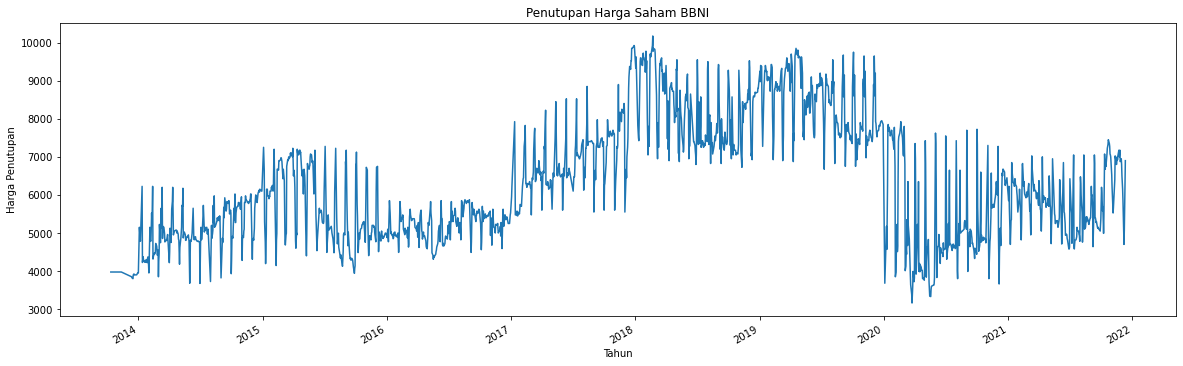

In [7]:
plt.figure(figsize=(20, 6)) 
plt.grid(True)
data_f['Penutupan'].plot()
#plt.plot(data_f.Penutupan)
#plt.plot(data_f['Penutupan'])
plt.title('Penutupan Harga Saham BBNI') 
plt.xlabel('Tahun') 
plt.ylabel('Harga Penutupan') 
plt.show()

**ANALISIS** : Harga saham "Penutupan" dengan kode BBNI mencapai nilai tertinggi pada kurun waktu 2018.

## Boxplot Persebaran Data Atribut "Penutupan"

Plot ini untuk menampilkan distribusi atau penyebaran data pada atribut "Penutupan".

<AxesSubplot:>

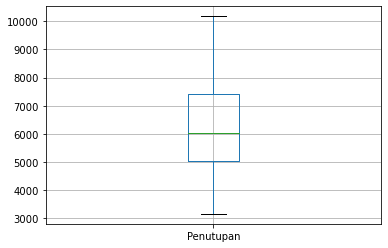

In [8]:
data_f.boxplot(column=['Penutupan']) 

**ANALISIS** : Dari plot diatas dapat diketahui bahwa median dari atribut "Penutupan" bernilai sekitar 6.000 ke atas. Selain itu, tidak terdapat outlier.

## Boxplot Persebaran Data Atribut "Pembukaan"

Plot ini untuk menampilkan distribusi atau penyebaran data pada atribut "Pembukaan".

<AxesSubplot:>

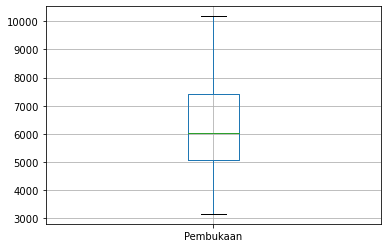

In [9]:
data_f.boxplot(column=['Pembukaan'])

**ANALISIS** : Dari plot diatas dapat diketahui bahwa median dari atribut "Pembukaan" bernilai sekitar 6.000 ke atas. Selain itu, tidak terdapat outlier.

## Boxplot Persebaran Data Atribut "Tertinggi"

Plot ini untuk menampilkan distribusi atau penyebaran data pada atribut "Tertinggi".

<AxesSubplot:>

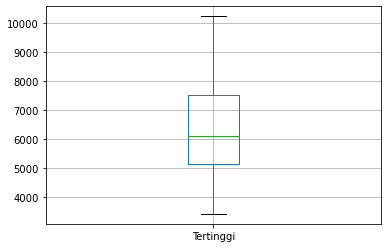

In [10]:
data_f.boxplot(column=['Tertinggi'])

**ANALISIS** : Dari plot diatas dapat diketahui bahwa median dari atribut "Tertinggi" bernilai sekitar 6.000 ke atas. Selain itu, tidak terdapat outlier.

## Boxplot Persebaran Data Atribut "Terendah"

Plot ini untuk menampilkan distribusi atau penyebaran data pada atribut "Tertinggi". 

<AxesSubplot:>

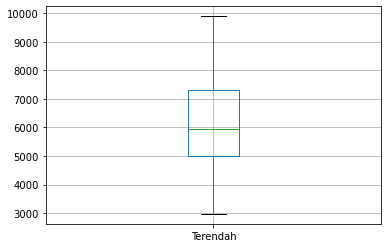

In [11]:
data_f.boxplot(column=['Terendah'])

**ANALISIS** : Dari plot diatas dapat diketahui bahwa median dari atribut "Terendah" bernilai sekitar 6.000 ke bawah. Selain itu, tidak terdapat outlier.

## Visualiasi Perbandingan Atribut

<Figure size 1152x576 with 0 Axes>

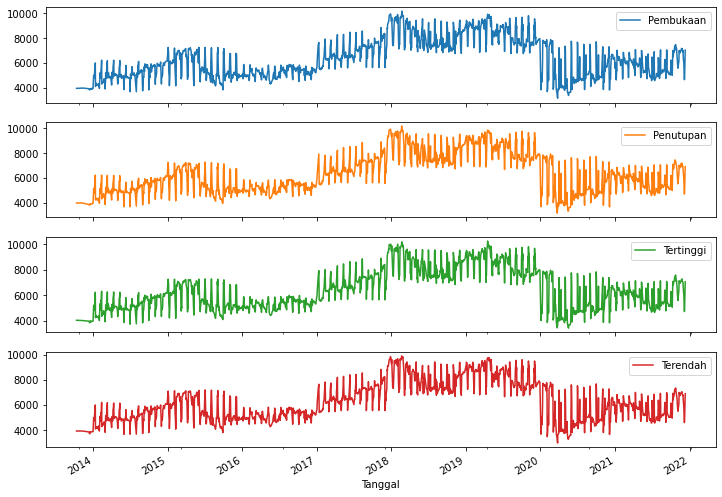

In [12]:
plt.figure(figsize=(16, 8)) 
cols = ['Pembukaan', 'Penutupan', 'Tertinggi', 'Terendah']
axes = data_f[cols].plot(figsize=(12, 9), subplots = True) 

plt.show()

**ANALISIS** : Harga saham normal (kinerja bank stabil), dapat dilihat pada plot di atas harga saham tidak fluktuatif sehingga dapat dikatakan normal.

## Heatmap Korelasi Antaratribut

Plot ini digunakan untuk memampilkan korelasi antaratribut pada data harga saham BBNI.

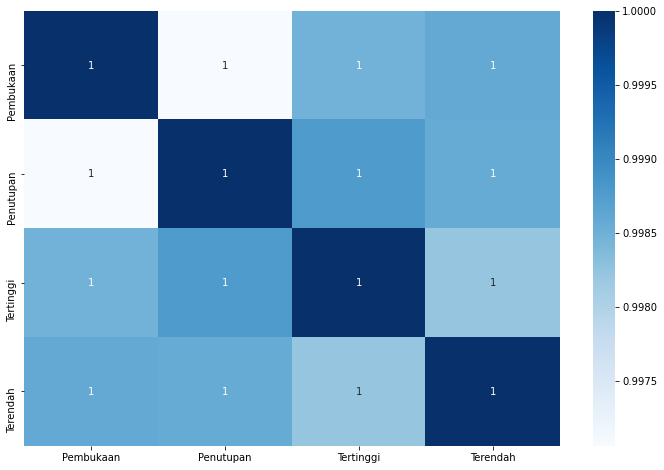

In [13]:
# deklarasi corr sebagai tampungan atribut yang akan dilihat korelasinya
plt.figure(figsize=(12,8))
corr = data_f[["Pembukaan", "Penutupan", "Vol.", "Tertinggi", "Terendah"]].corr()

# tampilkan sebagai heatmap
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

**ANALISIS** : Saling berhubungan karena dapat dilihat pada indeks yang nilainya mendekati 1.